In [1]:
#%%
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xtrack as xt
import xobjects as xo
import scipy

# Ring design

In [2]:
lcirc = 1000.0
lquad = 3.0
lbend = 5.0
max_dipole_field = 3.0
number_of_FODO = 8
pc_GeV = 20.0

Brho = 3.3356*pc_GeV


lFODO = lcirc/number_of_FODO
theta_max = max_dipole_field * lbend / Brho
min_number_of_dipoles = round((2.0*np.pi)/theta_max)

number_of_dipoles = 32
number_of_dipoles_per_FODO = number_of_dipoles/number_of_FODO

target_bmax = 300.0
def fun(f, L, target):
    return 2*f*np.sqrt(4*f+L)/np.sqrt(4*f-L) - target


f_0 = scipy.optimize.root(fun, 100, args=(lFODO, target_bmax))['x'][0]
f_0

112.88815320319954

In [3]:
2 * np.pi / number_of_dipoles

0.19634954084936207

In [4]:
number_of_dipoles_per_FODO

4.0

Text(0, 0.5, '$\\beta_{MAX}$ [m]')

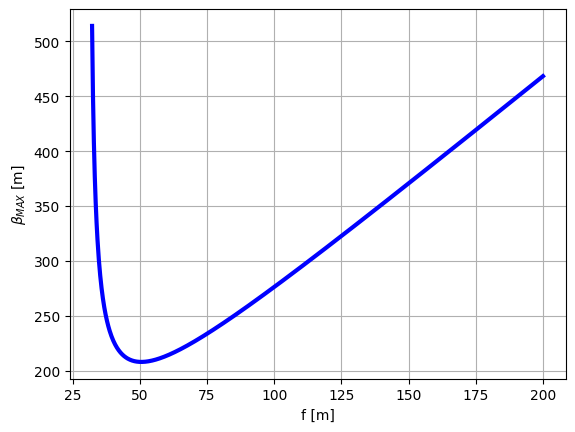

In [5]:
f = np.linspace(125/4+1,200, 1000)
plt.plot(f, fun(f, lFODO, target_bmax) + target_bmax, 'b',lw=3)
plt.grid(True)
plt.xlabel('f [m]')
plt.ylabel('$\\beta_{MAX}$ [m]')

# Size match

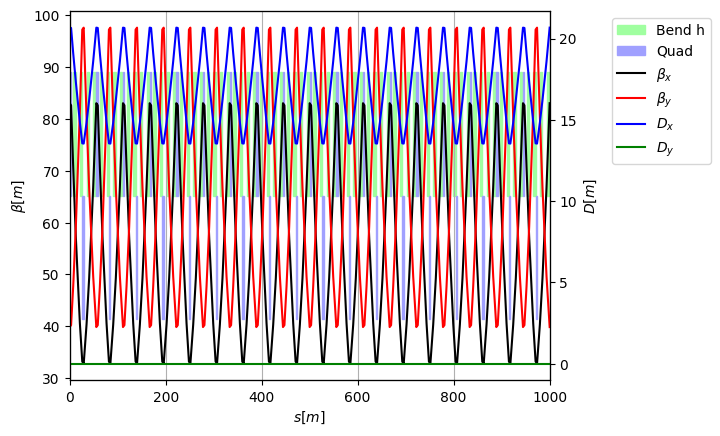

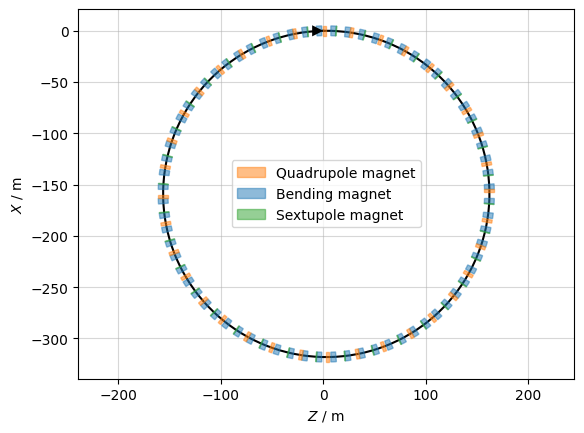

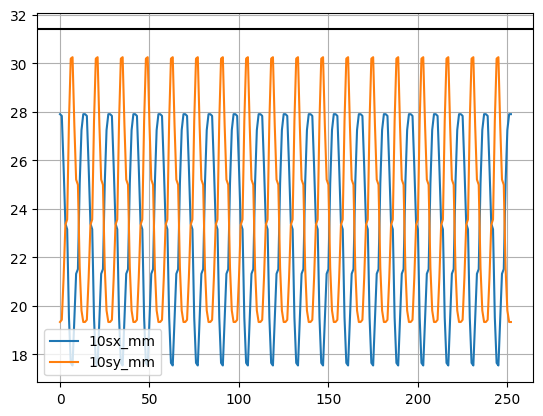

In [46]:
import xtrack as xt


lcirc = 1000.0
lquad = 3.0
lbend = 5.0
max_dipole_field = 3.0
number_of_FODO = 18
pc_GeV = 20.0
pc = pc_GeV*1e9

Brho = 3.3356*pc

lFODO = lcirc/number_of_FODO
theta_max = max_dipole_field * lbend / Brho
min_number_of_dipoles = round((2.0*np.pi)/theta_max)

number_of_dipoles = 32 * number_of_FODO / 8
number_of_dipoles_per_FODO = number_of_dipoles/number_of_FODO

target_bmax = 300.0

f_0 = 30

env = xt.Environment()
env['lquad'] = lquad
env['f0'] = f_0
env['k1'] = '1 / f0 / lquad'
env['lsection'] = lFODO
env['lbend'] = lbend
env['k0'] =  2 * np.pi / number_of_dipoles / lbend 
env['lsext'] = 0.5
env['k2f'] = 0
env['k2d'] = 0

bend = env.new('mb', xt.Bend, length='lbend', k0='k0', h='k0')
sextf = env.new('sextf', xt.Sextupole, length='lsext', k2='k2f')
sextd = env.new('sextd', xt.Sextupole, length='lsext', k2='k2d')


section = env.new_line(name='section', components=[
    env.new('q1', xt.Quadrupole, length='lquad', k1='k1', at='lquad/2'),
    env.place(bend, at='lsection/4 - lbend/2 - lquad/2'),
    env.place(sextf, at='lsection/4 - lquad/2 + lsext/2'),
    env.place(bend, at='2*lsection/4 - lbend/2 - lquad/2'),
    env.new('q2', xt.Quadrupole, length='lquad', k1='-k1', at='lsection/2'),
    env.place(bend, at='3*lsection/4 - lbend/2 - lquad/2'),
    env.place(sextd, at='3*lsection/4  - lquad/2 + lsext/2'),
    env.place(bend, at='4*lsection/4 - lbend/2 - lquad/2'),
    env.new('end', xt.Marker, at='lsection') 
     ])

#ring = number_of_FODO * section
ring = env.new_line(components = [env.new('_start_point', xt.Marker)]+number_of_FODO*[section])
#line.cut_at_s(np.linspace(0, 40, 100))

ring.particle_ref = xt.Particles(p0c=pc, mass0=xt.PROTON_MASS_EV) 
context = xo.ContextCpu()
ring.build_tracker(_context=context)

tw = ring.twiss(method='4d')
tw.plot()
ring.survey().plot()

gamma = pc / xt.PROTON_MASS_EV
sigma_max = lambda emitt_norm, beta: np.sqrt(emitt_norm*beta / gamma)
tw['10sy_mm'] = sigma_max(emitt_norm=2e-6, beta=tw['bety']) * 1e3 * 10
tw['10sx_mm'] = sigma_max(emitt_norm=2e-6, beta=tw['betx']) * 1e3 * 10
tw.to_pandas().plot(y=['10sx_mm', '10sy_mm'])
plt.axhline(31.4, color='black')
plt.grid(True)


In [18]:
ring.

Index(['name', 's', 'x', 'px', 'y', 'py', 'zeta', 'delta', 'ptau', 'W_matrix',
       'kin_px', 'kin_py', 'kin_ps', 'kin_xprime', 'kin_yprime', 'betx',
       'bety', 'alfx', 'alfy', 'gamx', 'gamy', 'dx', 'dpx', 'dy', 'dpy',
       'dx_zeta', 'dpx_zeta', 'dy_zeta', 'dpy_zeta', 'betx1', 'bety1', 'betx2',
       'bety2', 'mux', 'muy', 'muzeta', 'nux', 'nuy', 'nuzeta', 'phix', 'phiy',
       'phizeta', 'dzeta', 'c_minus_re', 'c_minus_im', 'c_r1', 'c_r2',
       'c_phi1', 'c_phi2', 'dmux', 'dmuy', 'bx_chrom', 'by_chrom', 'ax_chrom',
       'ay_chrom', 'wx_chrom', 'wy_chrom', 'ddx', 'ddpx', 'ddy', 'ddpy', 'k0l',
       'k1l', 'k2l', 'k3l', 'k4l', 'k5l', 'k0sl', 'k1sl', 'k2sl', 'k3sl',
       'k4sl', 'k5sl', 'angle_rad', 'rot_s_rad', 'hkick', 'vkick', 'ks',
       'length', 'element_type', 'isthick', 'parent_name', '10sy_mm',
       '10sx_mm'],
      dtype='object')

In [48]:
dqx_target, dqy_target = 0, 0

n_part = 1000
N_EX, N_EY = 2e-6, 2e-6
DPP = 1e-5

x_norm, px_norm = xp.generate_2D_gaussian(num_particles=n_part)
y_norm, py_norm = xp.generate_2D_gaussian(num_particles=n_part)

zeta = 0.0
dpp = np.random.rand(n_part) * DPP

# particles = ring.build_particles(
#     method="4d",
#     zeta=zeta,
#     delta=dpp,
#     x_norm=x_norm,
#     px_norm=px_norm,
#     y_norm=y_norm,
#     py_norm=py_norm,
#     nemitt_x=N_EX,
#     nemitt_y=N_EY,
# )

opt = ring.match(solve=False,
    vary=[
        xt.VaryList(['k2f', 'k2d'], step=1e-7),
    ],
    targets=[
        xt.TargetSet(dqx=dqx_target, dqy=dqy_target, tol=1e-3),
    ],
    method='4d')
opt.solve()

Matching: model call n. 24               



In [49]:
opt.log()

Table: 7 rows, 14 cols
iteration                   penalty alpha tag tol_met target_active hit_limits vary_active ...
0                           3.44536    -1     nn      yy            nn         yy         
1                          0.841852     0     ny      yy            nn         yy         
2                          0.106129     0     ny      yy            nn         yy         
3                         0.0341858     0     ny      yy            nn         yy         
4                        0.00585881     0     ny      yy            nn         yy         
5                        0.00113853     0     ny      yy            nn         yy         
6                       0.000331837     0     yy      yy            nn         yy         

In [50]:
env['k2f'], env['k2d']

(0.022271196494580238, -0.024208956339396764)

# Tracking

In [7]:
num_particles = 1000
sx = 1e-3 
sy = 1e-3 
spx = 1e-3 / gamma
spy = 1e-3 / gamma
particles = ring.build_particles(
                        x =  np.random.normal(0, sx, num_particles) ,
                        px = np.random.normal(0, spx, num_particles),
                        y =  np.random.normal(0, sy, num_particles),
                        py = np.random.normal(0, spy, num_particles),
                        zeta = np.zeros(num_particles),
                        delta = np.zeros(num_particles)
)

# particles = ring.build_particles(
#                         x_norm = np.random.normal(0, 1, num_particles),
#                         px_norm = np.random.normal(0, 1, num_particles),
#                         y_norm = np.random.normal(0, 1, num_particles),
#                         py_norm = np.random.normal(0, 1, num_particles),
#                         zeta = np.zeros(num_particles),
#                         delta = np.zeros(num_particles),
#                         nemitt_x=2e-6,
#                         nemitt_y=2e-6,
#                         method='4d'
# )

# particles = ring.build_particles(
#                         x_norm = 0,
#                         px_norm = 0,
#                         y_norm = 0,
#                         py_norm = 0,
#                         # zeta = 0,
#                         # delta = 0,
#                         nemitt_x = 0,
#                         nemitt_y = 0,
#                         method='4d'
# )
# Reference mass, charge, energy are taken from the reference particle.
# Particles are allocated on the context chosen for the line.

## Track (saving turn-by-turn data)
n_turns = 100
ring.track(particles, num_turns=n_turns, freeze_longitudinal=True,
              turn_by_turn_monitor=True)

In [8]:
beam = ring.record_last_track

In [9]:
gam, beta, alpha = tw.to_pandas().loc[0][['gamx', 'betx', 'alfx']]

cs_inv = lambda x, px: gam * x**2 + 2 * alpha * x * px + beta * px**2

emittance =  2.7107860236603027 um


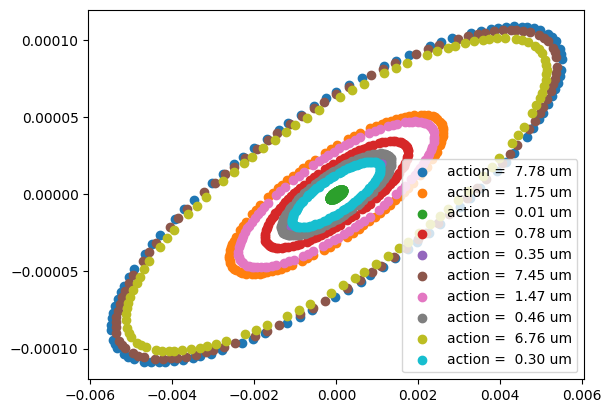

In [13]:
actions = []
for particle_id in range(10):
    x = beam.x[:, 0][beam.particle_id[:, 0] == particle_id]
    px = beam.px[:, 0][beam.particle_id[:, 0] == particle_id]
    action = cs_inv(x, px)[0]
    actions.append(action)
    plt.scatter(beam.x[beam.particle_id == particle_id], beam.px[beam.particle_id == particle_id], label=f'action = {action * gamma * 1e6 : .2f} um');
plt.legend()

print('emittance = ', np.mean(actions) * gamma * 1e6, 'um')